In [7]:
data = pd.read_csv('/content/Customer Churn.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

STEP 1: Inspetion of data
-> .info()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure and no total charges are recorded

In [ ]:
# @title Default title text
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [ ]:
data.isnull().sum().sum() #to check the null values

0

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data.duplicated().sum() #to check the duplicated values - also checkon the basis of unique values

0

In [ ]:
data["customerID"].duplicated().sum() #to check the duplicated values - also checkon the basis of unique values

0

Converted 0 and 1 value to yes and no

In [17]:
def con(value):
  if value == 1:
    return 'Yes'
  else:
    return 'No'

data["SeniorCitizen"] = data["SeniorCitizen"].apply(con)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


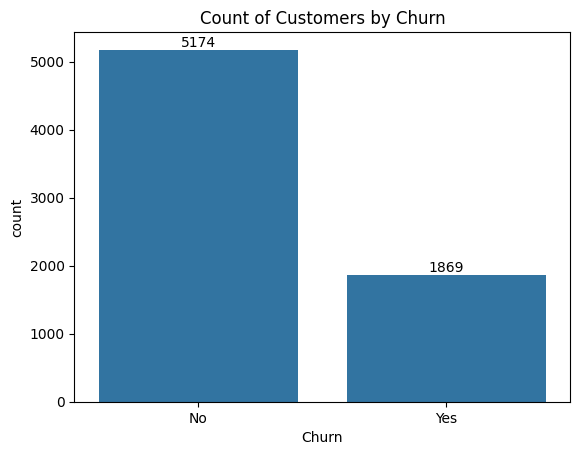

In [12]:
ax = sns.countplot(x= data['Churn'],data = data)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")

plt.show()

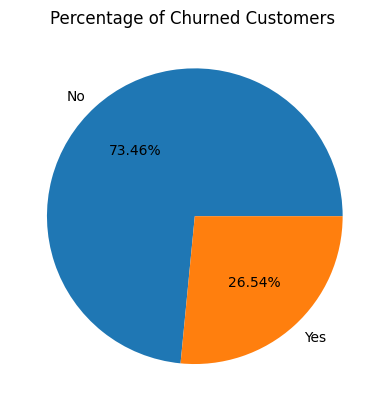

In [13]:
gb = data.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'],labels =gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers ")
plt.show()


From the given pie chart we can conclude that 26.54% of customers have churnd out


Let's explore the reasons

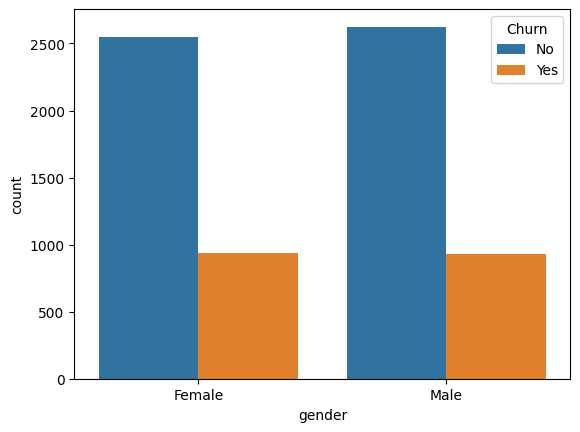

In [15]:
sns.countplot(x="gender",data = data, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

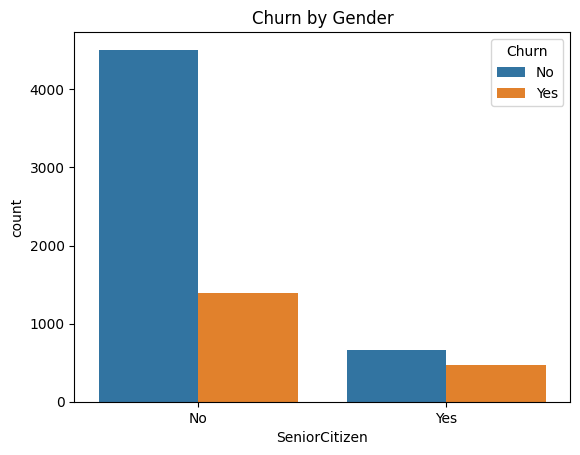

In [18]:
sns.countplot(x="SeniorCitizen",data = data, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

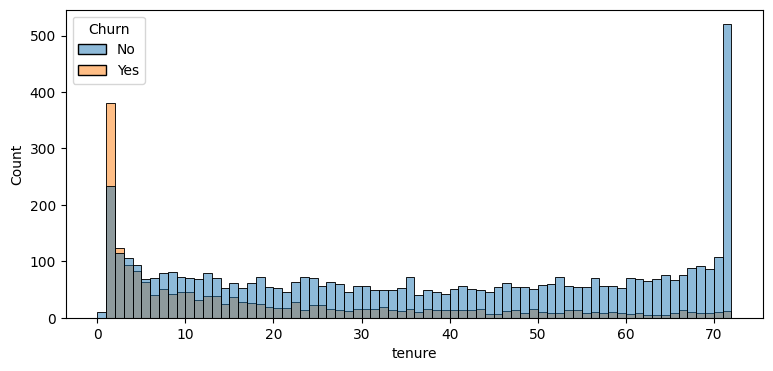

In [24]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data = data,bins = 72,hue ="Churn")
plt.show()


People who have used our services for long time have stayed and people who used our services for 1 or 2 months have churned

count of people based on contract

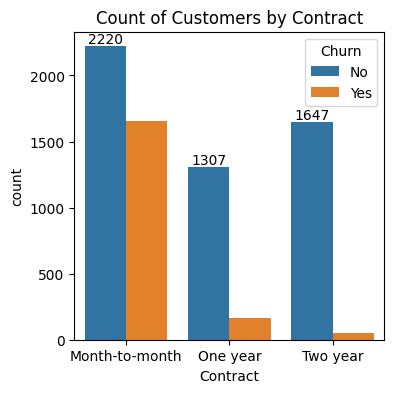

In [25]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [26]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

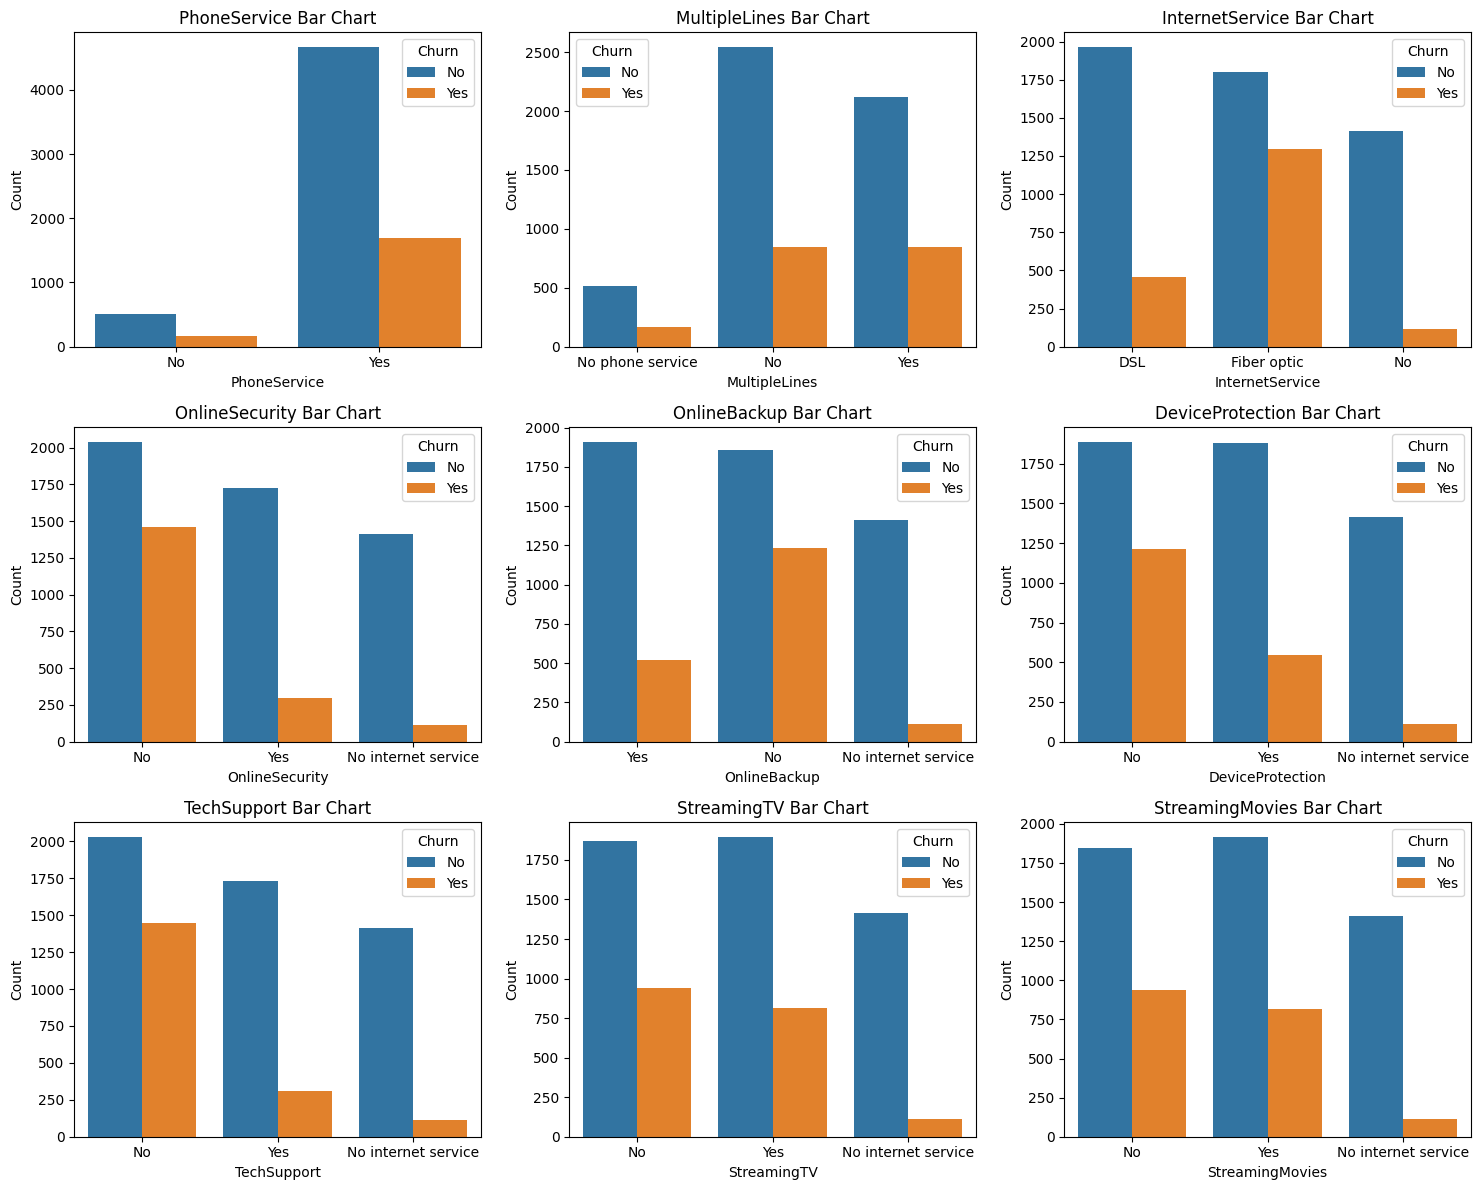

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame with the given columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots for bar charts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the grid to loop through

for i, col in enumerate(columns):
    sns.countplot(data=data, x=col, ax=axes[i],hue = data['Churn'])
    axes[i].set_title(f'{col} Bar Chart')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


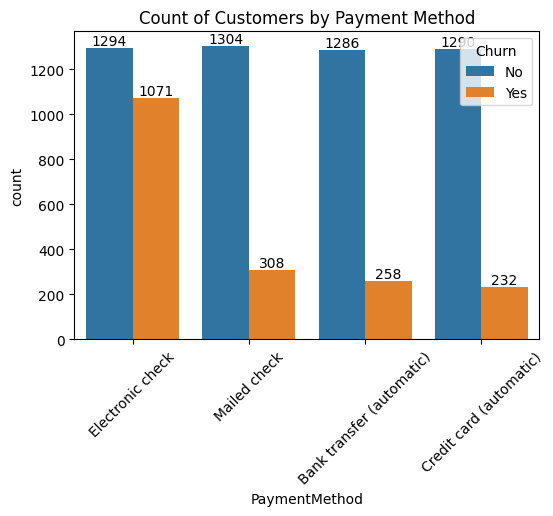

In [36]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customer is likely to churn if using electronic check as payment month